# Introduction to Data Science - NETWORK ANALYSIS

# WEEK 1
__Network / Graph Basics__
- Types of networks: directed vs undirected, multigraphs (multiple parallel edges between a node pair)
- Nodes, edges and their attributes
- Bipartite graphs: Two types of nodes where only nodes of DIFFERENT types can connect (example: people and hobbies)
- Projections of bipartite graphs: pair of nodes are connected if they have a common neighbor in the original bipartite graph

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import operator

# create Graph with A nodes and B edges with random edge_weights
def create_network(N_nodes, N_edges, G1):
    #N_nodes = 10
    import random
    import itertools
    cList = list(itertools.permutations(range(N_nodes), 2))    
    #N_edges = 15
    allCombos = []
    for x in range(N_edges):
        thisCombo = random.sample(cList,1)[0]
        cList = list(set(cList) - set(thisCombo)) # update list: remove selected combo
        allCombos.append(thisCombo)                
    G1.add_nodes_from(range(N_nodes))
    G1.add_edges_from(set(allCombos))
    nx.draw_networkx(G1)
    return G1

# create Graph with A nodes and B edges with RANDOM EDGE_WEIGHTS
def create_network_weights(N_nodes, N_edges, G1):
    #N_nodes = 10
    import random
    import itertools
    cList = list(itertools.permutations(range(N_nodes), 2))    
    #N_edges = 15
    allCombos = []
    for x in range(N_edges):
        thisCombo = random.sample(cList,1)[0]
        cList = list(set(cList) - set(thisCombo)) # update list: remove selected combo
        t = (*thisCombo, {'weight': random.sample(range(1,5),1)[0]})
        print(t)
        allCombos.append(t)                     
    G1.add_nodes_from(range(N_nodes))
    G1.add_edges_from(allCombos)
    weights = [G1[u][v]['weight'] for u,v in G1.edges()]
    nx.draw_networkx(G1, width=weights)
#    nx.draw_networkx(G1)
    return G1

-----------
__Representing networks numerically: ADJACENCY LIST, ADJACENCY MATRIX, EDGE LIST__ 

There are different ways to represent a graph numerically

(0, 3, {'weight': 2})
(1, 0, {'weight': 4})
(4, 2, {'weight': 4})
(0, 1, {'weight': 3})
(3, 4, {'weight': 2})
(2, 3, {'weight': 2})
(2, 3, {'weight': 1})


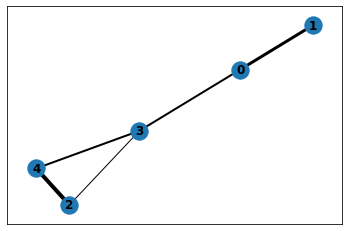

#1 ADJACENCY LIST ------
Useful for graphs without node/edge attributes.

The left-most item in each line represents the source node and the remaining items represent the nodes that are connected to it. Note that connections that have been considered previously (ie lines above) are not printed again
0 3 1
1
2 4 3
3 4
4

#2 ADJACENCY MATRIX ------
Each row represents a node and the columns mark whether or not it is connected with another node. Note that in MultiGraphs, there can be multiple connections between two nodes, resulting in numbers >1
[[0 1 0 1 0]
 [1 0 0 0 0]
 [0 0 0 1 1]
 [1 0 1 0 1]
 [0 0 1 1 0]]

If weight is set to weight (default), scores will reflect the weight of connections (can be > 1)
[[0 3 0 2 0]
 [3 0 0 0 0]
 [0 0 0 1 4]
 [2 0 1 0 2]
 [0 0 4 2 0]]

#3 EDGE LIST ------
Edge between node-pairs including attributes
0 3 {'weight': 2}
0 1 {'weight': 3}
2 4 {'weight': 4}
2 3 {'weight': 1}
3 4 {'weight': 2}

 - Edge list is my fav! Easy to query particular attributes



C:\Users\s01tk9\AppData\Local\Temp\ipykernel_2084\1572698969.py:12: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.adjacency_matrix(G1, weight = None).todense())
C:\Users\s01tk9\AppData\Local\Temp\ipykernel_2084\1572698969.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.adjacency_matrix(G1).todense())


In [10]:
print('There are different ways to represent a graph numerically\n')

G1 = nx.Graph()    
G1 = create_network_weights(5,7, G1)
plt.show()

print('#1 ADJACENCY LIST ------\nUseful for graphs without node/edge attributes.\n\nThe left-most item in each line represents the source node and the remaining items represent the nodes that are connected to it. Note that connections that have been considered previously (ie lines above) are not printed again')
for line in nx.generate_adjlist(G1):
    print(line)
    
print('\n#2 ADJACENCY MATRIX ------\nEach row represents a node and the columns mark whether or not it is connected with another node. Note that in MultiGraphs, there can be multiple connections between two nodes, resulting in numbers >1')
print(nx.adjacency_matrix(G1, weight = None).todense())
print('\nIf weight is set to weight (default), scores will reflect the weight of connections (can be > 1)')
print(nx.adjacency_matrix(G1).todense())

print('\n#3 EDGE LIST ------\nEdge between node-pairs including attributes')
for line in nx.generate_edgelist(G1):
    print(line)

print('\n - Edge list is my fav! Easy to query particular attributes\n')
#for line in nx.generate_edgelist(G1, data=['weight']):
#    print(line)

__DIRECTIONAL GRAPHS - useful for asymmetric relations (e.g. pecking order)__

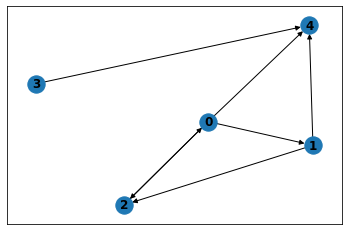

Adjacency LIST:
0 1 4 2
1 2 4
2 0
3 4
4
Adjacency MATRIX:
   (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (1, 2)	1
  (1, 4)	1
  (2, 0)	1
  (3, 4)	1
EDGE list:
0 1 {}
0 4 {}
0 2 {}
1 2 {}
1 4 {}
2 0 {}
3 4 {}


C:\Users\s01tk9\AppData\Local\Temp\ipykernel_2084\653107579.py:9: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print('Adjacency MATRIX:\n', nx.adjacency_matrix(G1))


In [11]:
# Use directional graphs
G1 = nx.DiGraph()    
G1 = create_network(5,7, G1)
plt.show()

print('Adjacency LIST:')
for line in nx.generate_adjlist(G1):
    print(line)
print('Adjacency MATRIX:\n', nx.adjacency_matrix(G1))
print('EDGE list:')
for line in nx.generate_edgelist(G1):
    print(line)


---------
__Importing Networks into PANDA DataFrames__
Nodes and edges can be easily imported into dataframes, however, not always into a single DF. When building a network based on DFs, my impression is that it is best to start with the edges and to add the nodes later 

SUMMARY of essential representations of networks using PANDAS
(4, 3, {'weight': 4})
(1, 2, {'weight': 1})
(1, 3, {'weight': 3})
(4, 2, {'weight': 3})
(0, 4, {'weight': 4})


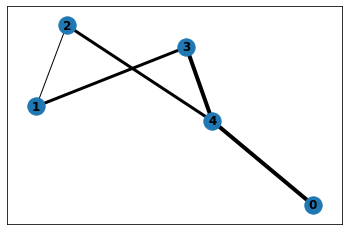

Node DF
    node attrDict
0     0       {}
1     1       {}
2     2       {}
3     3       {}
4     4       {}

Node Adjacency DF
     n0  n1  n2  n3  n4
n0   0   0   0   0   4
n1   0   0   1   3   0
n2   0   1   0   0   3
n3   0   3   0   0   4
n4   4   0   3   4   0

Edges DF
    n1  n2  weight
0   0   4       4
1   1   2       1
2   1   3       3
3   2   4       3
4   3   4       4


C:\Users\s01tk9\AppData\Local\Temp\ipykernel_2084\1131322334.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  dfAdjacency = pd.DataFrame(nx.adjacency_matrix(G1).todense(), columns = nodes, index = nodes)


In [12]:
print('SUMMARY of essential representations of networks using PANDAS')
G1 = nx.Graph()    
G1 = create_network_weights(5,5, G1);
plt.show();

dfNodes = pd.DataFrame(G1.nodes(data=True), columns = ['node', 'attrDict'])
nodes = ['n'+str(x) for x in list(G1.nodes)]
dfAdjacency = pd.DataFrame(nx.adjacency_matrix(G1).todense(), columns = nodes, index = nodes)
dfEdges = pd.DataFrame(G1.edges(data='weight'), columns = ['n1','n2', 'weight'])

print('Node DF\n', dfNodes)
print('\nNode Adjacency DF\n',dfAdjacency)
print('\nEdges DF\n', dfEdges)

__Chess example__ Building a network based on an edge list in a text file, and exporting the network into PD DataFrames for further computations. The example also touches on the "degrees" concept, which refers to the number of connections a node has

In [88]:
print('Read in an edgelist of a chess game to create a directional MultiGraph. It needs to be Multi as the same player can have won/lost in multiple games against the same or different opponent.Layout of edgelist: 1st column = white player ID, 2nd = black player ID, 3rd = who won (1=white, -1=black, 0=draw)')
# decommented: throws error (issues with online resources?) - used local file instead
# chess = nx.read_edgelist(r"https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/chess_graph.txt", data = [('outcome', int), ('timestamp', float)] , create_using = nx.MultiDiGraph())
chess = nx.read_edgelist(r"C:\Users\s01tk9\Desktop\Coursera\Applied Data Science with Python\assets\chess_graph.txt", data = [('outcome', int), ('timestamp', float)] , create_using = nx.MultiDiGraph())
chess.is_directed(), chess.is_multigraph() # check whether is directed & multigraph
#chess.edges(data=True)     # view

print('\nUse the degree function to figure out the number of games played per player. Degree returns the NUMBER OF EDGES connected to each node, regardless of edge direction')
# find player with most games (incoming & outgoing dirs)
played = chess.degree() 
borg = dict(played)
maxVal = max(borg.values())
x = list(borg.keys())[list(borg.values()).index(maxVal)] # put values in list, find key of maxVal
print('>>> Player {:} played {:} games\n'.format(x, maxVal))
# alternatively, can be done via PD
b = pd.Series(dict(played))
print('>>> Player ', b.sort_values().index[-1])

print('\nLoad edgelist into Pandas - do not forget to call data=True')
a = pd.DataFrame(chess.edges(data=True), columns = ['white', 'black', 'outcome']) 
print(a.head())
# prettify
a['timestamp'] = a['outcome'].map(lambda x: x['timestamp'])
a['outcome'] = a['outcome'].map(lambda x: x['outcome'])
a.head()

Read in an edgelist of a chess game to create a directional MultiGraph. It needs to be Multi as the same player can have won/lost in multiple games against the same or different opponent.Layout of edgelist: 1st column = white player ID, 2nd = black player ID, 3rd = who won (1=white, -1=black, 0=draw)

Use the degree function to figure out the number of games played per player. Degree returns the NUMBER OF EDGES connected to each node, regardless of edge direction
>>> Player 461 played 280 games

>>> Player  461

Load edgelist into Pandas - do not forget to call data=True
  white black                                        outcome
0     1     2  {'outcome': 0, 'timestamp': 885635999.999997}
1     1     3  {'outcome': 0, 'timestamp': 885635999.999997}
2     1     4  {'outcome': 0, 'timestamp': 885635999.999997}
3     1     5  {'outcome': 1, 'timestamp': 885635999.999997}
4     1     6  {'outcome': 0, 'timestamp': 885635999.999997}


,white,black,outcome,timestamp
0,1,2,0,8.856360e+08
1,1,3,0,8.856360e+08
2,1,4,0,8.856360e+08
3,1,5,1,8.856360e+08
4,1,6,0,8.856360e+08


In [89]:
print('\nDifferent approach to finding the player with the most matches played: Use adjacency matrix and check for games played as white and black')
print('1. Put Graph in DF\n2. Calculate overall games played as white and black (= rows vs columns)\n3. Get overall score, select max')
dfAdjacency = pd.DataFrame(nx.adjacency_matrix(chess).todense(), columns = list(chess.nodes()), index = list(chess.nodes())) 
df = pd.DataFrame(np.stack((np.nansum(dfAdjacency,axis=0), np.nansum(dfAdjacency,axis=1))), columns = list(chess.nodes()), index = ['white', 'black']).T
df['all'] = np.nansum(df,axis=1)
df.sort_values('all').iloc[-1]


Different approach to finding the player with the most matches played: Use adjacency matrix and check for games played as white and black
1. Put Graph in DF
2. Calculate overall games played as white and black (= rows vs columns)
3. Get overall score, select max


C:\Users\s01tk9\AppData\Local\Temp\ipykernel_2084\3344191773.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  dfAdjacency = pd.DataFrame(nx.adjacency_matrix(chess).todense(), columns = list(chess.nodes()), index = list(chess.nodes()))


white    133
black    147
all      280
Name: 461, dtype: int32

------------
# WEEK 2: Network CONNECTIVITY
- CLUSTERING coefficients (local, global: averaged or transitivity)
- DISTANCE measures: Paths (# node hops) 

__Clustering Coefficient__: Tendency for triadic closure in network

 ----- LOCAL Clustering Coefficient -----

Fraction of pairs of the node's friends that are friends with each other: For Cluster C
Clustering coeff increases if the node is part of more triads and increases the higher the degree of the node
NUMERATOR = #TRIADs the node is a part of
DENOMINATOR = node degree*(degree-1)/2


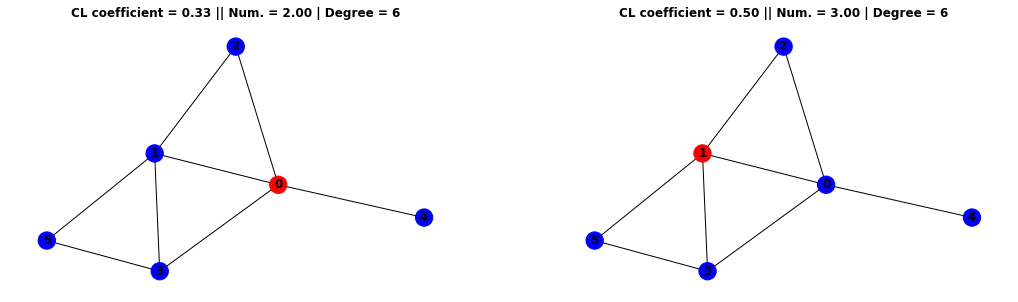

----- GLOBAL Clustering coefficient ---
Method 1: AVERAGE LOCAL CCs using *average_clustering*
AVE LOC = 0.583
Method 2: TRANSITIVITY [3*n_CLOSED / n_OPEN triads in network] using *transitivity*
TRANS = 0.529

NOTE: Both AVE LOC & TRANS measure tendency of edges to form Triads. TRANS weights nodes with high degree higher


In [15]:
print(' ----- LOCAL Clustering Coefficient -----\n')
print('Fraction of pairs of the node\'s friends that are friends with each other: For Cluster C')
print('Clustering coeff increases if the node is part of more triads and increases the higher the degree of the node')
print('NUMERATOR = #TRIADs the node is a part of')
print('DENOMINATOR = node degree*(degree-1)/2')

# create network
edgeList = [(0, 1), (0,2), (0,3), (0,4), (1,3), (1, 5), (3,5), (1,2)]
#edgeList = [(0, 1), (0,2), (0,3), (1,2)]
G = nx.Graph()
G.add_edges_from(edgeList)
pos = nx.spring_layout(G)

# plot two nodes
fig, ax = plt.subplots(1,2, figsize=(18,5))
for thisNode in range(2):
    plt.sca(ax[thisNode])
    cm = ['red' if node == thisNode else 'blue' for node in G ] # mark target red, rest blue
    nx.draw(G, pos=pos, node_color=cm, with_labels=True)
    res = [nx.clustering(G, thisNode), nx.triangles(G)[thisNode], nx.degree(G, thisNode)*(nx.degree(G, thisNode)-1)/2]
    plt.title('CL coefficient = {:.2f} || Num. = {:.2f} | Degree = {:.0f}'.format(*res))
plt.show()

print('----- GLOBAL Clustering coefficient ---')
print('Method 1: AVERAGE LOCAL CCs using *average_clustering*\nAVE LOC = {:.3f}'.format( nx.average_clustering(G)))
print('Method 2: TRANSITIVITY [3*n_CLOSED / n_OPEN triads in network] using *transitivity*\nTRANS = {:.3f}'.format( nx.transitivity(G)))

print('\nNOTE: Both AVE LOC & TRANS measure tendency of edges to form Triads. TRANS weights nodes with high degree higher')

In [16]:
nx.triangles(G)

{0: 2, 1: 3, 2: 1, 3: 2, 4: 0, 5: 1}

---------
__Distance: BREADTH-FIRST search algorithm__
- path from node X to others
- path LENGTH from node X to others

----- Two-point distance between 2 nodes -----
Mark shortest path from 1 to 7 before and after removing EDGE (2,7)


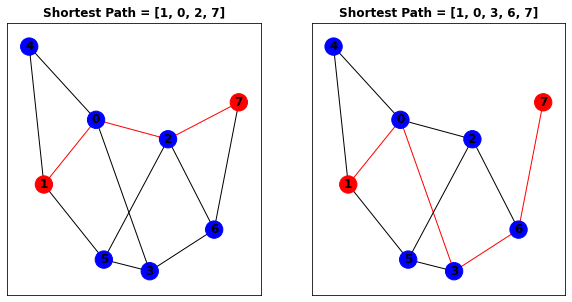

In [17]:
print('----- Two-point distance between 2 nodes -----')
# create network
G = nx.Graph()
edgeList = [(0, 1), (0,2), (0,3), (0,4), (1, 5), (3,5), (3,6), (1,4), (2,6), (2,7), (6,7), (2,5)]
G.add_edges_from(edgeList)
pos = nx.spring_layout(G)
cm_node = ['red' if x in [1,7] else 'blue' for x in G.nodes()] # to mark START and END nodes
print('Mark shortest path from 1 to 7 before and after removing EDGE (2,7)') 

fig, ax = plt.subplots(1,2, figsize=(10,5))
# SHORTEST PATH:
sp_nodes = nx.shortest_path(G, 1, 7)
sp_len = nx.shortest_path_length(G, 1, 7)
# 1) create edgeList to-be-marked
eList = []
for counter in range(len(sp_nodes)-1):
    s = sorted(sp_nodes[counter:counter+2]) # create sorted pair 
    eList.append((s[0], s[1]))              # add tupel
# HACK for loop:    eList = [((sorted(sp_nodes[counter:counter+2]))[0], (sorted(sp_nodes[counter:counter+2]))[1]) for counter in range(len(sp_nodes)-1)]   

# 2) create colmap
cm = []
for x in G.edges():
    if x in eList:
        cm.append('red')
    else:
        cm.append('black')
# HACK for loop:    cm = ['red' if x in eList else 'black' for x in G.edges()]   
plt.sca(ax[0]); nx.draw_networkx(G, pos=pos, edge_color= cm, node_color=cm_node);
plt.title('Shortest Path = {:}'.format( nx.shortest_path(G, 1, 7)));

G.remove_edge(2,7)
sp_nodes = nx.shortest_path(G, 1, 7)
eList = [((sorted(sp_nodes[counter:counter+2]))[0], (sorted(sp_nodes[counter:counter+2]))[1]) for counter in range(len(sp_nodes)-1)]   
cm = ['red' if x in eList else 'black' for x in G.edges()]
plt.sca(ax[1]); nx.draw_networkx(G, pos=pos, edge_color= cm, node_color=cm_node);
plt.title('Shortest Path = {:}'.format( nx.shortest_path(G, 1, 7))); plt.show()


----- Distance between 1 node and all other nodes -----

Results BREADTH-FIRST Search [(1, 0), (1, 5), (0, 2), (0, 3), (0, 4), (2, 6), (2, 7)]

Complete paths from node 1 {1: [1], 0: [1, 0], 5: [1, 5], 2: [1, 0, 2], 3: [1, 0, 3], 4: [1, 0, 4], 6: [1, 0, 2, 6], 7: [1, 0, 2, 7]}
dict of target nodes: steps required to get there from start node 1
 {1: 0, 0: 1, 5: 1, 2: 2, 3: 2, 4: 2, 6: 3, 7: 3}


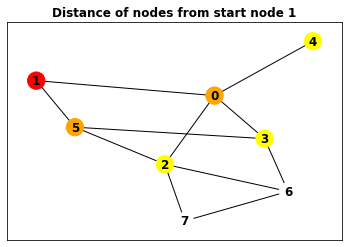

In [18]:
G = nx.Graph()
edgeList = [(0, 1), (0,2), (0,3), (0,4), (1, 5), (3,5), (3,6), (2,6), (2,7), (6,7), (2,5)]
G.add_edges_from(edgeList)
print('----- Distance between 1 node and all other nodes -----\n')

T = nx.bfs_tree(G,1)
print('Results BREADTH-FIRST Search', T.edges())

print('\nComplete paths from node 1', nx.shortest_path(G, 1))
sp = nx.shortest_path_length(G, 1)
print('dict of target nodes: steps required to get there from start node 1\n',sp)
cm = []
for x in G.nodes():
    if sp[x] == 0:
        cm.append('red')
    elif sp[x] == 1:
        cm.append('orange')
    elif sp[x] == 2:
        cm.append('yellow')
    elif sp[x] == 3:
        cm.append('white')
nx.draw_networkx(G, node_color = cm);
plt.title('Distance of nodes from start node 1'); 

---------
__DISTANCE MEASURES__

NETWORK LEVEL:
- AVERAGE DISTANCE: MEAN path length between all possible node combinations > *average_shortest_path_length*
- DIAMETER: MAX path length between any pair of nodes > *diameter*

ITEM LEVEL:
- ECCENTRICITY: Longest path to any other node > *eccentricity*
- RADIUS: min eccentricity in network > *radius*
- PERIPHERY: maximally eccentric nodes (ECC = DIAM) > *periphery*
- CENTER: minimally eccentric nodes (ECC = RAD) > *center*

There are two measures that describe distances on a network level:
AVERAGE DISTANCE is mean path length in network
DIAMETER is max path length in network

AVE path length =  1.91
DIAMETER =  4  [max path length]

ECCENTRICITY is the crucial measure to localize a node in a network. It is the opposite of centrality: The larger the eccentricity, to more peripheral the node. {0: 3, 1: 3, 2: 2, 3: 2, 4: 4, 5: 3, 6: 3, 7: 3, 8: 3, 9: 4}

RADIUS = minimum eccentricity (minimum path length to other nodes: RAD = 2
CENTER = set of nodes with minimum eccentricity (ECCENTRICITY = RADIUS) [2, 3]
PERIPHERY = set of nodes with maximum eccentricity (ECCENTRICITY = DIAMETER [4, 9]


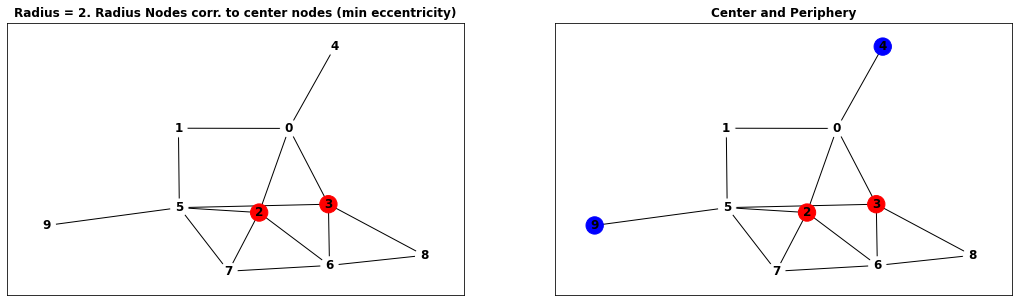

In [19]:
G = nx.Graph()
edgeList = [(0, 1), (0,2), (0,3), (0,4), (1, 5), (3,5), (3,6), (2,6), (2,7), (6,7), (2,5), (3,8),(6,8), (5,9), (5,7)]
G.add_edges_from(edgeList)
pos = nx.spring_layout(G)
print('There are two measures that describe distances on a network level:\nAVERAGE DISTANCE is mean path length in network\nDIAMETER is max path length in network')
print('\nAVE path length = ', round(nx.average_shortest_path_length(G),2))
print('DIAMETER = ', nx.diameter(G), ' [max path length]')

fig, ax = plt.subplots(1,2, figsize=(18,5))
plt.sca(ax[0])

# eccentricity, radius
sp = nx.eccentricity(G)
rad = nx.radius(G)
cm = ['red' if sp[x] == rad else 'white' for x in G.nodes()]
nx.draw_networkx(G, pos=pos, node_color = cm);
plt.title('Radius = {:}. Radius Nodes corr. to center nodes (min eccentricity)'.format(rad));

# center, periphery
plt.sca(ax[1])
perL = nx.periphery(G)
cL = nx.center(G)
cm = []
for x in G.nodes():
    if x in cL:
        cm.append('red') 
    if x in perL:
        cm.append('blue')
    elif x not in cL + perL:
        cm.append('white')
nx.draw_networkx(G, pos=pos, node_color = cm);
plt.title('Center and Periphery');

print('\nECCENTRICITY is the crucial measure to localize a node in a network. It is the opposite of centrality: The larger the eccentricity, to more peripheral the node.', nx.eccentricity(G))
print('\nRADIUS = minimum eccentricity (minimum path length to other nodes: RAD = {:}'.format(nx.radius(G)))
print('CENTER = set of nodes with minimum eccentricity (ECCENTRICITY = RADIUS)', nx.center(G))
print('PERIPHERY = set of nodes with maximum eccentricity (ECCENTRICITY = DIAMETER', nx.periphery(G))

__Karate Club Example__

SUMMARY STATS:
MEAN path length between any 2 nodes = 2.41
MIN path length from node X to any node Y [RADIUS] = 3
MAX path length from node X to any node Y [DIAMETER] = 5


Text(0.5, 1.0, 'Friendship network in a 34-member Karate club (red = center nodes, blue = periphery)')

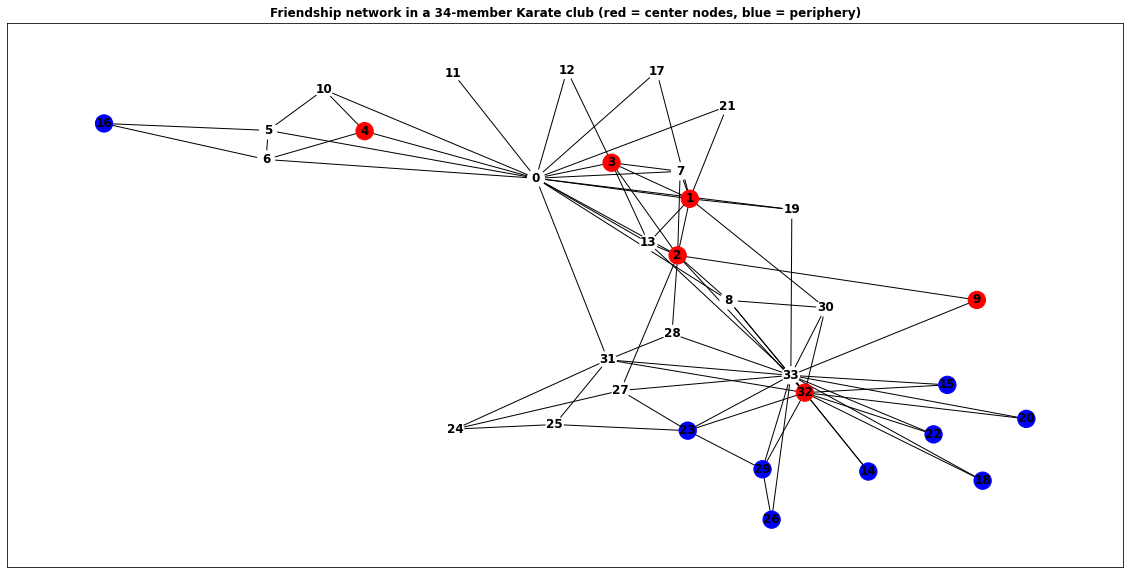

In [20]:
# Karate club example
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label = 0)

print('SUMMARY STATS:\nMEAN path length between any 2 nodes = {:.2f}\nMIN path length from node X to any node Y [RADIUS] = {:}\nMAX path length from node X to any node Y [DIAMETER] = {:}'.format(nx.average_shortest_path_length(G), nx.radius(G), nx.diameter(G)))

# find centre nodes
cm = ['white'] * len(G.nodes())
cm = ['red' if x in nx.center(G) else cm[x-1] for x in G.nodes()] # note that first note is 1, not 0
cm = ['blue' if x in nx.periphery(G) else cm[x-1] for x in G.nodes()]
fig = plt.figure(figsize=(20,10))
nx.draw_networkx(G, node_color = cm); plt.title('Friendship network in a 34-member Karate club (red = center nodes, blue = periphery)')

-----------
__CONNECTED GRAPHS & CONNECTED COMPONENTS__
- undirected graph is *connected* IF there is a path between any pair of nodes > *is_connected*
- *connected components* = chunks: must be connected within the chunk, but no connection to any node outside chunk > *connected_components*
- connectivity in directed graphs: can be *strongly* connected (path between any pair of nodes in both directions) or *weakly* connected (path between any pair in only ONE direction ... eq to is_connected in undirected graph) > *is_strongly_connected, is_weakly_connected*


CONNECTIVITY of UNDIRECTED graph
is_connected network:  False
Connected components: [{0, 1, 2}, {3, 4, 5}, {6}]


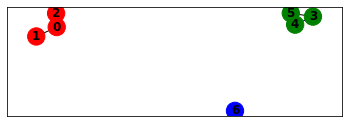

Component node 1 is a member of:  {0, 1, 2}


In [21]:
G = nx.Graph()
edgeList = [(0,1), (0,2), (3,4),(3,5), (4,5)]
G.add_edges_from(edgeList)
G.add_node(6)

print('CONNECTIVITY of UNDIRECTED graph\nis_connected network: ', nx.is_connected(G))
cc = sorted(nx.connected_components(G))
print('Connected components:', cc)
cm = []
for x in G.nodes():
    if x in cc[0]:
        cm.append('red')
    if x in cc[1]:
        cm.append('green')
    if x in cc[2]:
        cm.append('blue')
fig = plt.figure(figsize = (6,2))
nx.draw_networkx(G, node_color=cm); plt.show()
print('Component node 1 is a member of: ', nx.node_connected_component(G,1))


CONNECTIVITY of DIRECTED graph
A DIR graph is STRONGLY connected when each node can reach any other node and vice versa. It is WEAKLY connected when converting the network into an undirected graph leads to a connected network
is_strongly_connected:  False
is_weakly_connected:  True


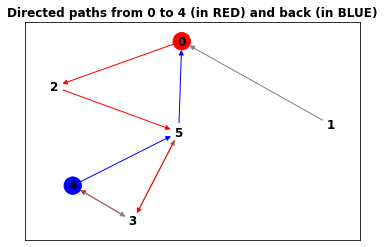

In [22]:
print('CONNECTIVITY of DIRECTED graph')
G = nx.DiGraph()
edgeList = [(0,2), (3,4), (4,3), (3,5), (4,5), (5,0), (2,5), (1,0), (5,3)]
G.add_edges_from(edgeList)
print('A DIR graph is STRONGLY connected when each node can reach any other node and vice versa. It is WEAKLY connected when converting the network into an undirected graph leads to a connected network')
print('is_strongly_connected: ', nx.is_strongly_connected(G))
print('is_weakly_connected: ', nx.is_weakly_connected(G))

def cm_edges(G, u,v):    
    try:
        zed = nx.shortest_path(G, u, v)
        eList = [(zed[counter:counter+2][0], zed[counter:counter+2][1]) for counter in range(len(zed)-1)]
    except BaseException:
        print('nope')
        eList = []
    return eList
    
eList1 = cm_edges(G, 0, 4)
eList2 = cm_edges(G, 4, 0)
cm  = ['gray']*len(G.edges())
cm = ['red' if x in eList1 else y for x, y in zip(G.edges(), cm)]
cm = ['blue' if x in eList2 else y for x, y in zip(G.edges(), cm)]
# nodes: mark 0 as blue, 4 as red
cm_n  = ['white']*len(G.nodes())
cm_n  = ['red' if x == 0 else y for x, y in zip(G.nodes(), cm_n)]
cm_n  = ['blue' if x == 4 else y for x, y in zip(G.nodes(), cm_n)]
nx.draw_networkx(G, edge_color=cm, node_color = cm_n); plt.title('Directed paths from 0 to 4 (in RED) and back (in BLUE)');

---------
__CONNECTIVITY and ROBUSTNESS__
- robustness: ability of a network to maintain its structural integrity (connectivity) when attacked
- attacks: Taking out NODES or EDGES

Number of NODES to cut to disrupt the network:  1
NODE to cut to disrupt connectivity {0}
Number of EDGES to cut to disrupt the network:  1
EDGEs to cut to disrupt connectivity {(11, 0)}


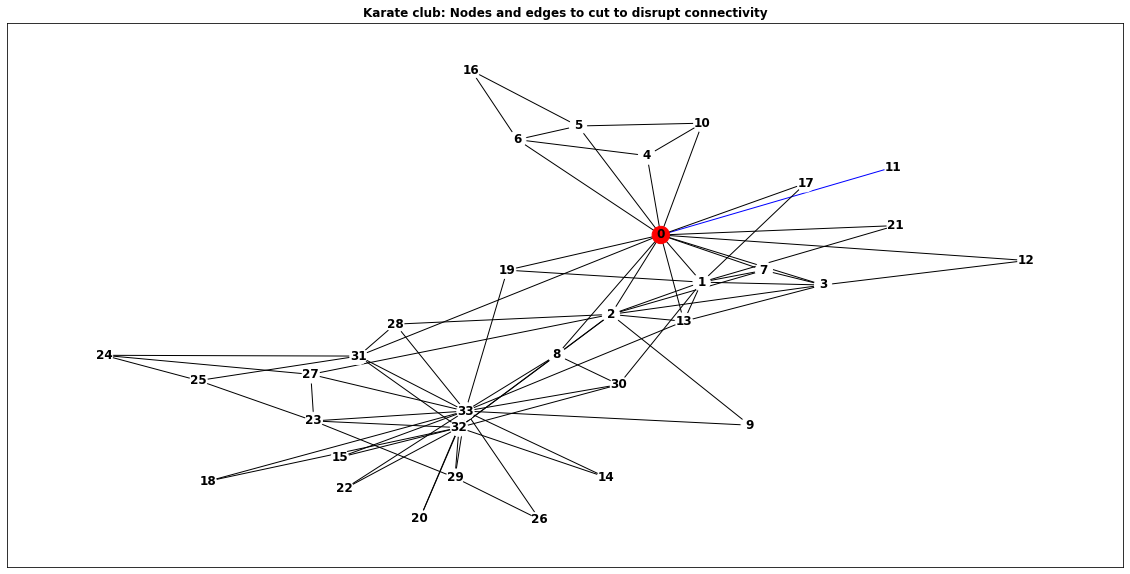

In [23]:
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label = 0)

print('Number of NODES to cut to disrupt the network: ', nx.node_connectivity(G))
print('NODE to cut to disrupt connectivity', nx.minimum_node_cut(G))

print('Number of EDGES to cut to disrupt the network: ', nx.edge_connectivity(G))
print('EDGEs to cut to disrupt connectivity', nx.minimum_edge_cut(G))

# get colormap for nodes and edges
cm_n = ['red' if x in nx.minimum_node_cut(G) else 'white' for x in G.nodes()]
ec = nx.minimum_edge_cut(G)
ec_all = []
for x in ec:
    ec_all.append(x)
    ec_all.append((x[1], x[0]))
cm_e = ['blue' if x in ec_all else 'black' for x in G.edges()]    

fig = plt.figure(figsize=(20,10))
nx.draw_networkx(G, node_color = cm_n, edge_color=cm_e); plt.title('Karate club: Nodes and edges to cut to disrupt connectivity');

____________________
__NETWORK VISUALIZATION__ (Filip J example: Major US cities connectivity / costs of moving in the US)
- Layout: labels, axis
- Content: transparency, node / edge size, color

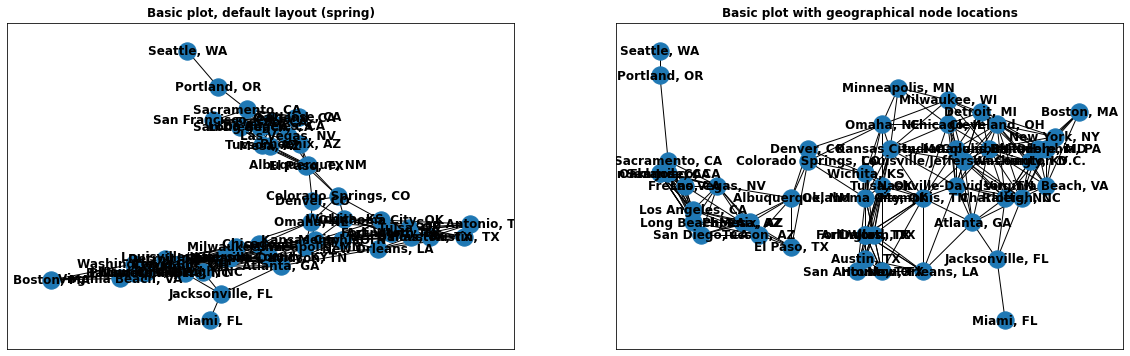

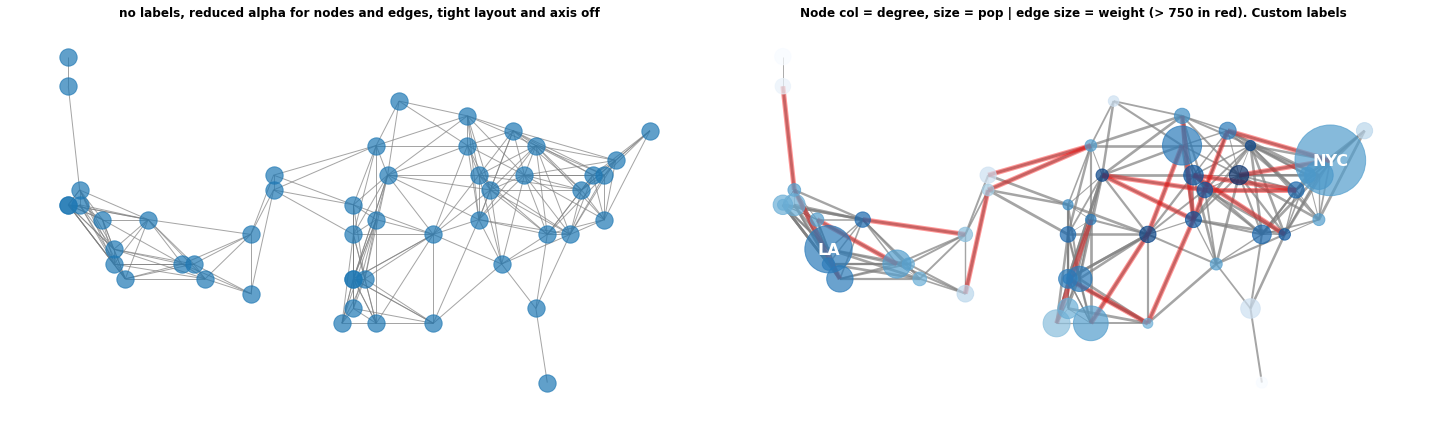

In [51]:
# Graph G uses an outdated data format. The helpher FX below updates it by exporting to dataframe, then re-creating edges & nodes
def helper_readG(G):
    # start creating EDGE List
    a,b = zip(*G.edge.items())              # now b is a dict for the target city and weight of conn. of uneven length
    multiplySourceBy =  [len(x) for x in b] # get its length and blow up source cities to put in dataframe
    sourceL = []
    for x, y in zip(a, multiplySourceBy):   # repeat each source X times, where X is length of target dict
        temp = [x for count in range(y)]
        sourceL.extend(temp)
        
    # readout target info
    targL = []; attribL = []
    for x in b:
        targName, connData = zip(*x.items()) 
        targL.extend(targName)        
        zed = [z for x in connData for z in list(x.values())] # weird double loop to flatten list of lists. Note: last loop is the inner loop
        attribL = attribL + zed
    
    # put edge List in Dataframe
    edges = pd.DataFrame((sourceL, targL, attribL)).T
    edges.columns = ['node1', 'node2', 'weight']
    
    # Creat node list
    a,b = zip(*G.node.items())
    nodes = pd.DataFrame(data = b, index=a)
    
    # adding the node attributes
    F = nx.from_pandas_edgelist(edges, 'node1', 'node2', 'weight')
    nx.set_node_attributes(F, nodes['population'].to_dict(), 'population')
    nx.set_node_attributes(F, nodes['location'].to_dict(), 'location')
    return F

# //////////////// read_gpickle from online resource may throw an error (I left it in) 
# read graph 
# G = nx.read_gpickle(r'C:\Users\s01tk9\Desktop\Coursera\Applied Data Science with Python\assets\major_us_cities')    # the notebook was generated using a local file
G = nx.read_gpickle(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/major_us_cities')
G = helper_readG(G)

fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.sca(ax[0])
nx.draw_networkx(G); plt.title('Basic plot, default layout (spring)');
pos = nx.get_node_attributes(G, 'location')
plt.sca(ax[1])
nx.draw_networkx(G, pos); plt.title('Basic plot with geographical node locations');

# PRETTIFY PLOT ///////
x# without labels, reduced alpha for nodes (alpha) and edges (edge_color)
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.sca(ax[0])
nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.5'); plt.axis('off'); plt.tight_layout(); plt.title('no labels, reduced alpha for nodes and edges, tight layout and axis off');

# Display properties in graph:
# EDGES: get connection strength
width = [nx.get_edge_attributes(G, 'weight')[x] for x in G.edges()]
# NODES: get node degree & population 
population = [nx.get_node_attributes(G, 'population')[x] for x in G.nodes()]
degree = [nx.degree(G, x) for x in G.nodes()]
# adjust weights to match limits
def helper_adjustWeights(w, minmax):
    scaleF = (minmax[1] - minmax[0]) / (max(w) - min(w))       
    return [(x - min(w)) * scaleF + minmax[0] for x in w]
    
width = helper_adjustWeights(width, [.1, 3])
degree = helper_adjustWeights(degree, [1, 15])
population = helper_adjustWeights(population, [100, 5000])

plt.sca(ax[1])
nx.draw_networkx(G, pos, node_color = degree, node_size = population, width = width, alpha=0.7, with_labels=False, edge_color='.5', cmap=plt.cm.Blues); plt.axis('off'); plt.tight_layout();

# mark connections with more than 750k passengers
width750 = [x for x in G.edges() if nx.get_edge_attributes(G, 'weight')[x]>750]
nx.draw_networkx_edges(G, pos, edgelist=width750 , edge_color='r', alpha=0.4, width=5)

# add labels for NY & LA
nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=16, font_color='w');
plt.title('Node col = degree, size = pop | edge size = weight (> 750 in red). Custom labels');

_____________
# WEEK 3 CENTRALITY (= importance of nodes / edges)

__Degree and closeness centrality__
- Degree centrality: reflects number of connections of node (degree of node / N - 1)
- Closeness centrality: reflects how close node is to other nodes (N - 1 / SUM of length of all shortest paths for node)

If I am not mistaken, the range of both centrality indices is 0-1

DEGREE CENTRALITY is based on assumption that important nodes have many connections. In UNDIR graphs, use *nx.degree_centrality()*. In the case of DIRECTED graphs, one distinguishes between INGOING and OUTGOING degree centrality (*nx.in_degree_centrality(G), nx.out_degree_centrality()*)
CLOSENESS centrality reflects how close a node is to all other nodes. To calculate it, the numerator is N - 1 and the denominator is the SUM of the shortest paths lengths from the node to all other nodes. NOTE: There is a problem if the graph is not connected, in which case it is not possible to reach all other nodes from a node X. Workaround 1 is to only consider connected nodes, Workaround 2 is to normalize by the fraction of connected nodes [WA 2 is more intuitive and default in latest Networkx version]


Text(0.5, 1.0, 'CLOSENESS CENTRALITY scores per node of Karate Network')

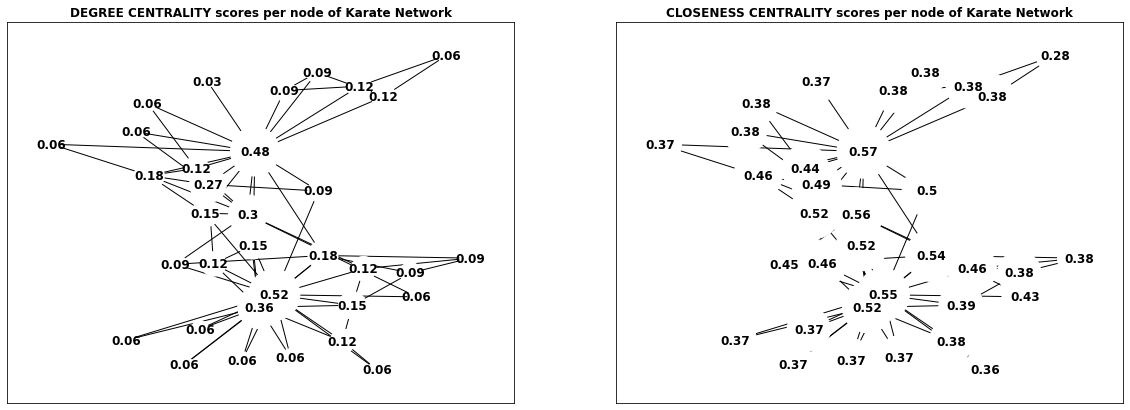

In [52]:
print('DEGREE CENTRALITY is based on assumption that important nodes have many connections. In UNDIR graphs, use *nx.degree_centrality()*. In the case of DIRECTED graphs, one distinguishes between INGOING and OUTGOING degree centrality (*nx.in_degree_centrality(G), nx.out_degree_centrality()*)')

G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label = 0)
degC = nx.degree_centrality(G)
pos = nx.spring_layout(G)

valL = [np.round(value,2) for key, value in degC.items()]
degC = dict(zip(degC.keys(), valL))
valCsc = [c*5000 for key, c in degC.items()]

fig, ax = plt.subplots(1,2,figsize=(20,7))
plt.sca(ax[0])
nx.draw_networkx(G, pos=pos, labels = degC, node_size=valCsc, with_labels=True, node_color = ['white']*len(G.nodes()))
plt.title('DEGREE CENTRALITY scores per node of Karate Network')


print('CLOSENESS centrality reflects how close a node is to all other nodes. To calculate it, the numerator is N - 1 and the denominator is the SUM of the shortest paths lengths from the node to all other nodes. NOTE: There is a problem if the graph is not connected, in which case it is not possible to reach all other nodes from a node X. Workaround 1 is to only consider connected nodes, Workaround 2 is to normalize by the fraction of connected nodes [WA 2 is more intuitive and default in latest Networkx version]')
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label = 0)
clo = nx.closeness_centrality(G)

valC = [np.round(c,2) for k, c in clo.items()]
valCsc = [c*5000 for key, c in clo.items()]

clo = dict(zip(clo.keys(), valC))
plt.sca(ax[1])
nx.draw_networkx(G, pos=pos, labels = clo, node_size= valCsc, with_labels=True, node_color = ['white']*len(G.nodes()))
plt.title('CLOSENESS CENTRALITY scores per node of Karate Network')

__________
__BETWEENNESS CENTRALITY__
- idea: important nodes connect other nodes (i.e., are in the shortest path between pairs of other nodes)

BETWEENNESS centrality: Calculated as ratio where
numerator = number of shortest paths between Y & Z that include node X
denominator = number of shortest paths between Y & Z
Nodes that cannot be reached get a score of 0

ENDPOINTS: Results depend on whether or not the node X in question is considered. To ignore it, set endpoints to False
NORMALIZATION: As BWC increases with network size, it is normalized by dividing through the number of pairs of nodes.
This is (N-2)*(N-1)/2 in UNDIR graphs and (N-2)*(N-1) in DIR graphs


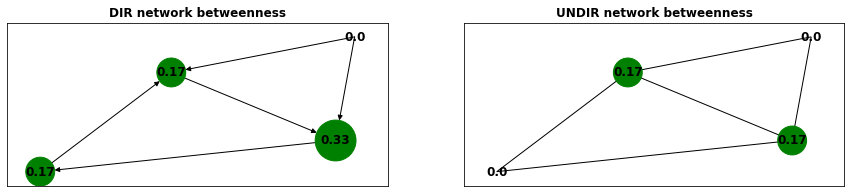

Note that BWC is not always higher in directed networks


In [53]:
print('BETWEENNESS centrality: Calculated as ratio where\nnumerator = number of shortest paths between Y & Z that include node X\ndenominator = number of shortest paths between Y & Z')
print('Nodes that cannot be reached get a score of 0')
print('\nENDPOINTS: Results depend on whether or not the node X in question is considered. To ignore it, set endpoints to False')
print('NORMALIZATION: As BWC increases with network size, it is normalized by dividing through the number of pairs of nodes.\nThis is (N-2)*(N-1)/2 in UNDIR graphs and (N-2)*(N-1) in DIR graphs')

G = nx.DiGraph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'A')
G.add_edge('D', 'B')
G.add_edge('D','C')
pos = nx.spring_layout(G)

bwc = nx.betweenness_centrality(G, normalized=True, endpoints=False)
valC = [np.round(c,2) for x,c in bwc.items()]
valCsc = [c*5000 for x,c in bwc.items()]

fig,ax = plt.subplots(1,2,figsize=(15,3))
plt.sca(ax[0])
nx.draw_networkx(G,pos=pos, labels = dict(zip(bwc.keys(), valC)), node_size = valCsc, node_color = ['green']*len(G.nodes()))
plt.title('DIR network betweenness')

# convert to undir netw
G = nx.Graph(G)
bwc = nx.betweenness_centrality(G, normalized=True, endpoints=False)
valC = [np.round(c,2) for x,c in bwc.items()]
valCsc = [c*5000 for x,c in bwc.items()]
plt.sca(ax[1])
nx.draw_networkx(G, pos=pos,labels = dict(zip(bwc.keys(), valC)), node_size = valCsc, node_color = ['green']*len(G.nodes()))
plt.title('UNDIR network betweenness'); plt.show()
print('Note that BWC is not always higher in directed networks')

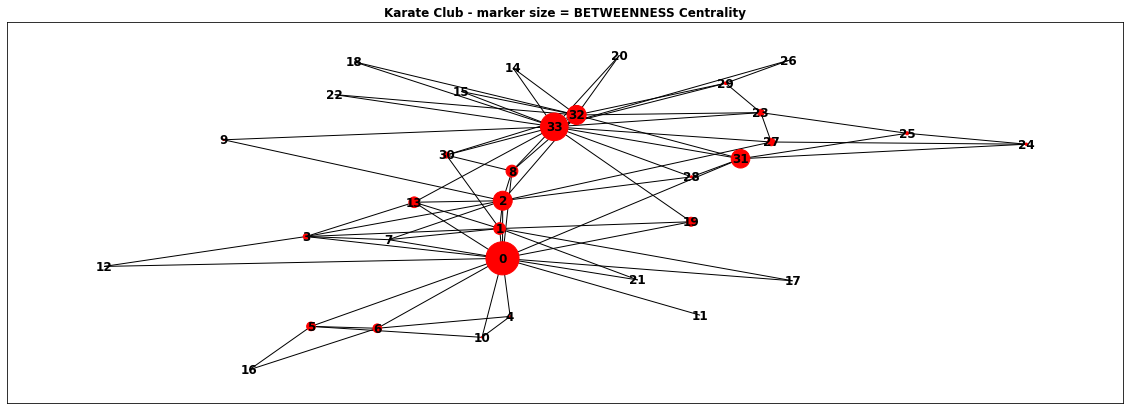

In [57]:
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label = 0)
bwc = nx.betweenness_centrality(G)

valC = [c*2500 for x,c in bwc.items()]
fig = plt.figure(figsize=(20,7))
nx.draw_networkx(G, node_size = valC, node_color = ['red']*len(G.nodes()))
plt.title('Karate Club - marker size = BETWEENNESS Centrality'); plt.show();


As calculating BWC is computationally demanding, one might want to only take a subset of nodes to approximate it


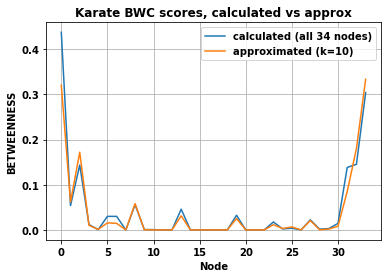

In [58]:
print('As calculating BWC is computationally demanding, one might want to only take a subset of nodes to approximate it')
bwc = nx.betweenness_centrality(G)
b = pd.DataFrame(zip(*bwc.items()), index = ['Node', 'BWC']).T 

# approximate using only 10 nodes
bwc_a = nx.betweenness_centrality(G, k = 10)
b['BWC_a'] = bwc_a.values()

plt.plot(b['Node'], b['BWC'], label = 'calculated (all 34 nodes)')
plt.plot(b['Node'], b['BWC_a'], label = 'approximated (k=10)')
plt.xlabel('Node'); plt.ylabel('BETWEENNESS'); plt.legend(); plt.title('Karate BWC scores, calculated vs approx'); plt.grid();


BWC can also be calculated for edges


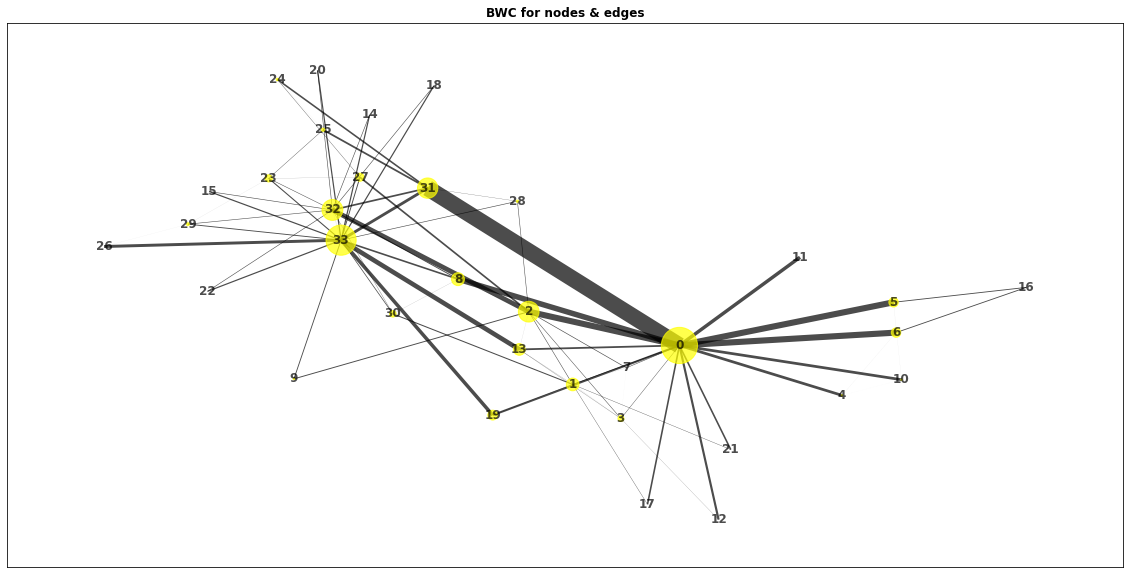

In [59]:
print('BWC can also be calculated for edges')
a = nx.edge_betweenness_centrality(G)
#ew = [c*c*c*10000 for c in a.values()]
ew = [c*c*1000 for c in a.values()]
b = nx.betweenness_centrality(G)
nodeSize = [c*3000 for k,c in b.items()]
fig = plt.figure(figsize=(20,10))
nx.draw_networkx(G, width = ew, alpha = .7,node_color=['yellow']*len(G.nodes()), node_size = nodeSize)
plt.title('BWC for nodes & edges');

Lets define SUBSETs ie network components and check for betweenness between them using *nx.betweenness_centrality_subset*.


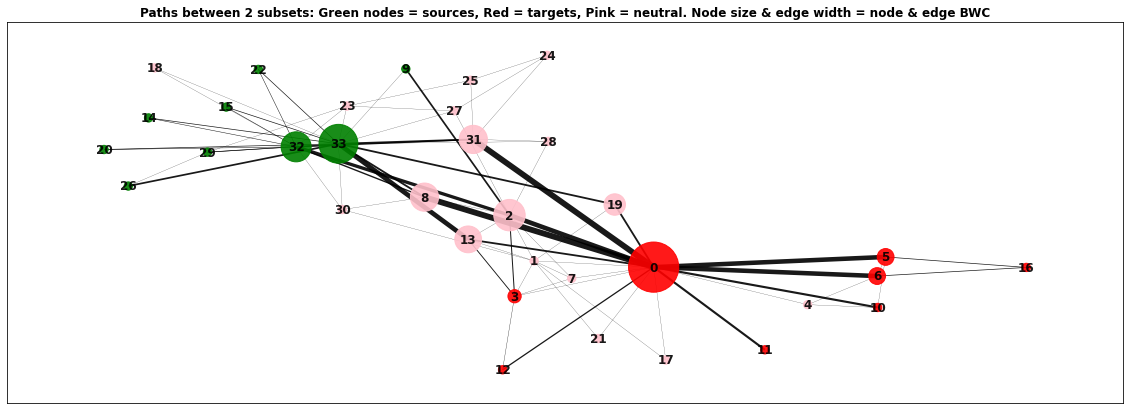

In [68]:
print('Lets define SUBSETs ie network components and check for betweenness between them using *nx.betweenness_centrality_subset*.')
nodesG1 = [33, 32, 20, 29, 15, 26, 14, 22, 9]
nodesG2 = [0, 3, 12, 10, 5, 11, 16, 6]
a = nx.betweenness_centrality_subset(G, nodesG1, nodesG2, normalized=True) # sources, targets
valC = [c*50000+70 for x,c in a.items()] # determine node size

# determine colors: green = source, red = target, pink = neutral / neither subset
cm = []
for c in G.nodes():
    if c in nodesG1:
        cm.append('green')
    elif c in nodesG2:
        cm.append('red')
    else:
        cm.append('pink')

a = nx.edge_betweenness_centrality_subset(G, nodesG1, nodesG2, normalized=True) # sources, targets
ew = [c*c*30000+.2 for c in a.values()]

fig = plt.figure(figsize=(20,7))
nx.draw_networkx(G, alpha = .9, width = ew, node_color = cm, node_size=valC)
plt.title('Paths between 2 subsets: Green nodes = sources, Red = targets, Pink = neutral. Node size & edge width = node & edge BWC');

--------------
__Page rank (Google)__
- importance of node depends on number of incoming edges
- basic PageRank update rule: re-evaluates rank for all pages simultaneously

PAGERANK. Invented by Google to assess importance of page, as quantified by the sum of incoming weights. Works for UNDIR graphs but typical use case is DIR graphs. It is done in an ITERATIVE process that calculates PR: Imagine the rank of a page indexes its importance. On each iteration, each page gets a share of importance from other nodes, via paired conndections.

HOW DOES IT WORK?
- STEP 1: Each page gets the same share (1/N)
- Step 2: PR update -> new PageRank. Repeat K times

Each node has its worth (PR) that is determined by the summed PR flow coming from other nodes. 
The amount another node contributes to this flow depends on its PR and number of outgoing connections: PR_flow(Y) = PR(Y) / out_degree(Y)')

RANDOM-WALK:
- PageRank indexes the chance that surfing on the net will lead you to page X (eventually / after K steps)


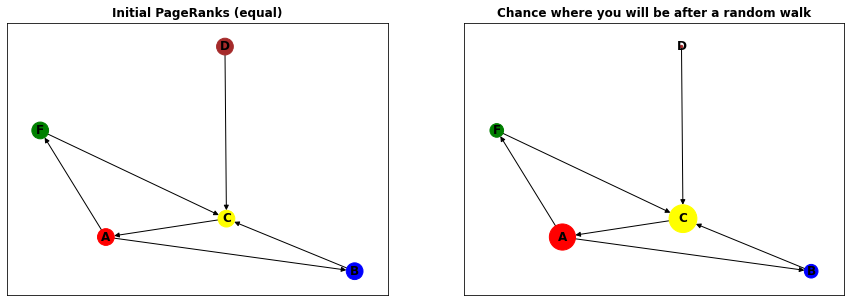

In [69]:
G = nx.DiGraph()
G.add_edge('A', 'F')
G.add_edge('B', 'C')
G.add_edge('C', 'A')
G.add_edge('A', 'B')
G.add_edge('D', 'C')
G.add_edge('F', 'C')
pos = nx.spring_layout(G)

fig, ax = plt.subplots(1,2,figsize=(15,5))
# get number of ingoing & outgoing connections
cm = ['red', 'green', 'blue', 'yellow', 'brown']
# current PageRank - step 1
pr = [7000*1/(len(G.nodes())*len(G.nodes()))] *len(G.nodes()) 
plt.sca(ax[0])
nx.draw_networkx(G, pos = pos, node_color=cm, node_size = pr)
plt.title('Initial PageRanks (equal)')
# final step
a = nx.pagerank(G)
pr = [7000*c*c for c in a.values()]
plt.sca(ax[1])
nx.draw_networkx(G, pos = pos, node_color=cm, node_size = pr)
plt.title('Chance where you will be after a random walk');

__Hubs and authorities__ (*nx.hits()*)
- Idea: Separate weights for target nodes (auths) and pointer nodes (hubs)
- Authorities: These are the relevant webpages a user wants
- Hubs: These are webpages that point to the relevant webpages

Similar to PageRank, the HITS algorithm works in iterations. It starts with uniform weights for both Hubs & Auths. On every step, these weights are updated simultaneously and will eventually converge. High scores imply good hubs/auths. Note that a page can be an excellent hub and a poor authority or vice versa.

- Good Auths = Nodes with incoming edges from good hubs (ie nodes with high hub scores)
- Good Hubs = Nodes with outgoing edges to good auths (ie high auth scores)


same graph as above, but now with Hubs & Authorities (HITS)


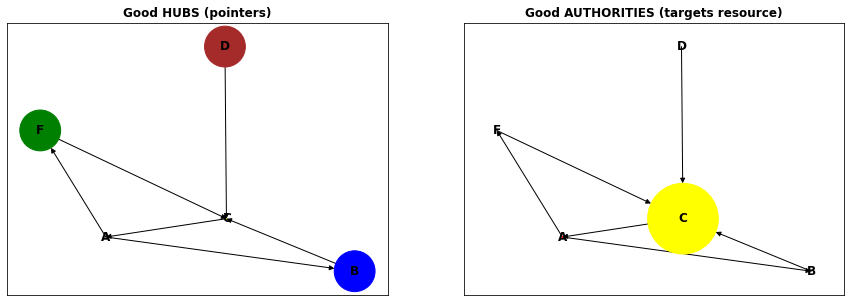

In [71]:
print('same graph as above, but now with Hubs & Authorities (HITS)')
fig, ax = plt.subplots(1,2,figsize=(15,5))
# get number of ingoing & outgoing connections
cm = ['red', 'green', 'blue', 'yellow', 'brown']
hubs,auths = nx.hits(G)

plt.sca(ax[0])
pr = [c*5000 for c in hubs.values()]
nx.draw_networkx(G, pos = pos, node_color=cm, node_size = pr)
plt.title('Good HUBS (pointers)')

plt.sca(ax[1])
pr = [c*5000 for c in auths.values()]
nx.draw_networkx(G, pos = pos, node_color=cm, node_size = pr)
plt.title('Good AUTHORITIES (targets resource)');



_________
# WEEK 4: NETWORK EVOLUTION

- __LUCKY FEW, UNLUCKY MANY__: Very few nodes have large centrality, most have low centrality, following a POWER LAW of centrality
- __RICH GET RICHER__ law of popularity: When networks develop, new nodes tend to become neighbors of existing nodes with high centrality
- __SMALL WORLD__: the diameter of massive networks is surprisingly small, around 6-7 steps (path length)

__Degree distributions__
- HISTOGRAMS: in large networks, indices of centrality are not normally distributed but massively skewed
- LOG-LOG plots: power law of centrality become obvious as a linear relation if plotted on a log-log scale (e.g., log degree vs log frequency) 

Example Internet Blogs
For raw degree and most centrality measures the distribution resembles a power law


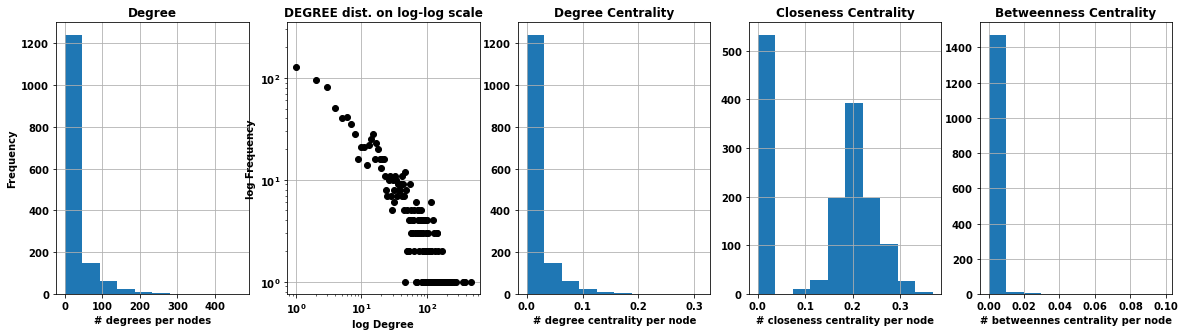

In [75]:
print('Example Internet Blogs\nFor raw degree and most centrality measures the distribution resembles a power law')
G = nx.read_gml(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/blogs.gml')    # may throw an error (bc online resource?)
# G = nx.read_gml(r'C:\Users\s01tk9\Desktop\Coursera\Applied Data Science with Python\assets\blogs.gml')     # local file was used to generate this notebook
fig,ax = plt.subplots(1,5, figsize=(20,5))

a = nx.degree_centrality(G)
plt.sca(ax[2])
plt.hist(a.values()); plt.grid(); plt.title('Degree Centrality'); plt.xlabel('# degree centrality per node'); 

a = nx.closeness_centrality(G)
plt.sca(ax[3])
plt.hist(a.values()); plt.grid(); plt.title('Closeness Centrality'); plt.xlabel('# closeness centrality per node'); 

a = nx.betweenness_centrality(G, normalized=True, endpoints=False)
plt.sca(ax[4])
plt.hist(a.values()); plt.grid(); plt.title('Betweenness Centrality'); plt.xlabel('# betweennes centrality per node'); 

a,deg = zip(*list(nx.degree(G)))
plt.sca(ax[0])
plt.hist(deg); plt.grid(); plt.title('Degree'); plt.xlabel('# degrees per nodes'); plt.ylabel('Frequency');

a,deg = zip(*list(nx.degree(G)))
zed = [list(deg).count(x) for x in range(max(list(deg))+1)]
plt.sca(ax[1])
plt.plot(range(max(list(deg))+1), zed, 'ko'); plt.grid();
plt.xscale('log'); plt.yscale('log'); plt.title('DEGREE dist. on log-log scale'); plt.xlabel('log Degree'); plt.ylabel('log Frequency');

--------
__Simulating networks__
- __Preferential Attachment Model__ (barabasi_albert graph, left): add nodes iteratively and connect to ONE existing node. Probability of selected node increases with its degree.
- __Small World Model__ (watts_strogartz graph, right): start with a ring of N nodes where each ring is connected to K neighbors. On each iteration and for each EDGE, there is a probability p that the edge rewires to a different existing node. 

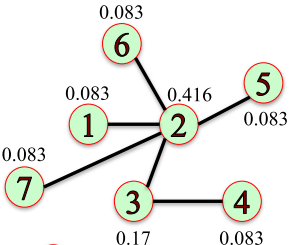 
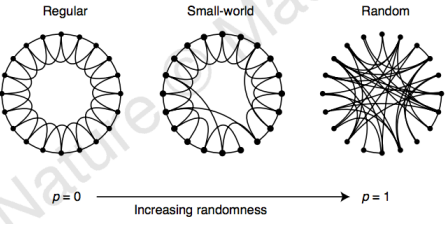


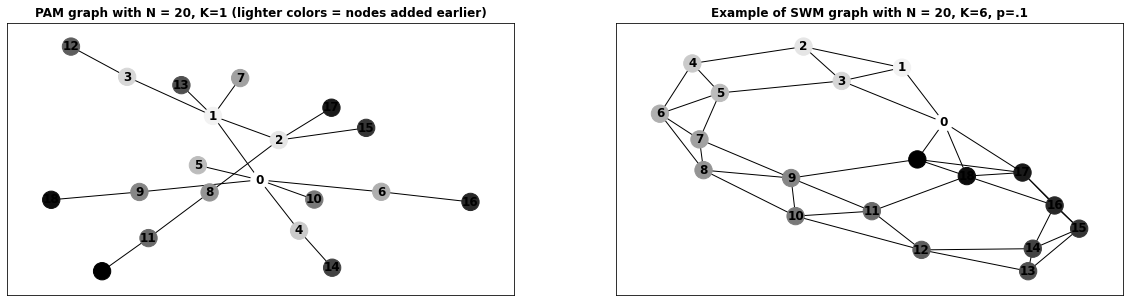

LEFT: Preferential Attachment Model (aka *nx.barabasi_albert(n,k)* graph): Nodes are added iteratively and connected to K existing node(s). Which nodes are selected to dock onto depends on its degree. Hence, creates a RICH GET RICHER phenomenon.

RIGHT: Small World Model (aka *nx.watts_strogatz(n,k,p)*: Edges are rewired with probability p, starting with a ring-like graph of N nodes with K neighbors.


In [76]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
plt.sca(ax[0])
G = nx.barabasi_albert_graph(20, 1)
nx.draw_networkx(G, node_color=(1-np.array(G.nodes()))/len(G.nodes()), cmap='gray'); 
plt.title('PAM graph with N = 20, K=1 (lighter colors = nodes added earlier)')

G = nx.watts_strogatz_graph(20, 5, .1)
plt.sca(ax[1])
nx.draw_networkx(G, node_color=(1-np.array(G.nodes()))/len(G.nodes()), cmap='gray'); 
plt.title('Example of SWM graph with N = 20, K=6, p=.1')
plt.show();

print('LEFT: Preferential Attachment Model (aka *nx.barabasi_albert(n,k)* graph): Nodes are added iteratively and connected to K existing node(s). Which nodes are selected to dock onto depends on its degree. Hence, creates a RICH GET RICHER phenomenon.') 
print('\nRIGHT: Small World Model (aka *nx.watts_strogatz(n,k,p)*: Edges are rewired with probability p, starting with a ring-like graph of N nodes with K neighbors.') 


__REAL world networks__ are characterized by: 
- degrees follow a POWER LAW
- high CLUSTERING COEFFICIENT
- small SHORTEST PATH length (median = 6)

__PAM networks__ have degrees following a power law and have small shortest paths length but LOW clustering coeffs 

__SWM networks__ (with small p values) have have high clustering coeffs and small shortest paths length but their degrees DOES NOT follow a power law 

Comparing Real World Network (BLACK), Preferential Attachment Model PAM (BLUE) & Small World Model SWM (RED). NOTE: PAM is pretty good except with clustering coeff, which is mimicked well by SWM


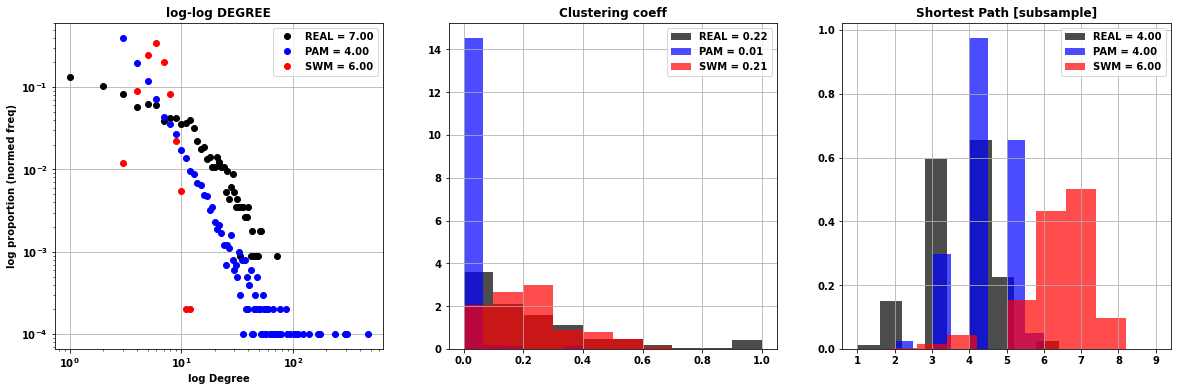

In [78]:
print('Comparing Real World Network (BLACK), Preferential Attachment Model PAM (BLUE) & Small World Model SWM (RED). NOTE: PAM is pretty good except with clustering coeff, which is mimicked well by SWM')

def plotDescrStats(G, col, tStr):
    c,d = zip(*nx.degree(G))
    #degree log-log
    dll = [ d.count(i)/len(d) for i in set(d)]
    #dll = [ d.count(i) for i in set(d)]
    label = tStr + ' = {:.2f}'.format(np.median(d))
    plt.sca(ax[0]); plt.plot(list(set(d)), dll, 'o', color=col, label = label); plt.xscale('log'); plt.yscale('log');
    plt.xlabel('log Degree'); plt.ylabel('log proportion (normed freq)'); plt.grid(); plt.title('log-log DEGREE');
    plt.legend()
    
    #clustering
    a = nx.clustering(G)
    d = a.values(); 
    label = tStr + ' = {:.2f}'.format(nx.average_clustering(G))
    plt.sca(ax[1]); plt.hist(d, alpha=.7,color=col, density=True, label= label); plt.grid(); plt.title('Clustering coeff')
    plt.legend()
    
    # shortest path (approx)
    import random
    N_sample = 3000; pathL = []
    for x in range(N_sample):
        n1,n2=random.sample(range(len(G.nodes())),2)
        pathL.append(nx.shortest_path_length(G, n1,n2))
    label = tStr + ' = {:.2f}'.format(np.median(pathL))
    plt.sca(ax[2]); plt.hist(pathL, color=col, alpha=.7, density=True, label=label); plt.title('Shortest Path [subsample]'); plt.grid();  
    plt.legend()

# --------------
fig,ax=plt.subplots(1,3, figsize=(20,6))
G = nx.read_gml(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/friendships.gml')  # may throw error
# G = nx.read_gml(r'C:\Users\s01tk9\Desktop\Coursera\Applied Data Science with Python\assets\friendships.gml') # used local file for creating notebook
G = nx.convert_node_labels_to_integers(G, first_label = 0)
plotDescrStats(G, 'black', 'REAL')

G = nx.barabasi_albert_graph(10000, 3)
plotDescrStats(G, 'blue','PAM')
G = nx.watts_strogatz_graph(10000, 6, .3)
plotDescrStats(G, 'red', 'SWM'); 

___________
__Link Prediction problem__: Given a network can we predict EDGE(s) that will form in the future? i.e., __which 2 nodes will connect?__ There are at least 5 basic + 2 more advanced prediction algorithms. They produce quite different predictions, so their output is often used in ML to train a classifier and let the empirical results decide which one(s) work best.

__1. DEGREEs__
- Preferential Attachment: the 2 nodes with the max PRODUCT of their degrees will connect

__2. COMMON NEIGHBORS__
- Commmon neighbor: max number of NEIGHBORS shared by 2 nodes 
- Jaccard coefficient: max number of neighbors shared by 2 nodes, normalized by sum of all their neighbors

__3. Resources__
- Resource alloc index: min DEGREE of common NEIGHBORS (actually, fraction of resource that a node can send to another through common neighbors)
- Adamic-Adar index: as resource alloc ind but log normalized 

See below for illustrations of four algorithms. Here is how the fifth algorithm (ie Common Neighbors) works. Simply put, it tries to create triangles:



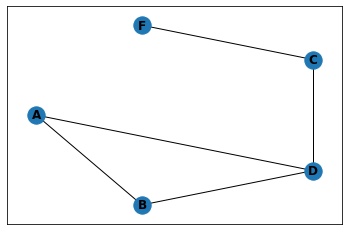

Possible new connections (w shared neighbors) [('D', 'F', 1), ('A', 'F', 0), ('A', 'C', 1), ('F', 'B', 0), ('B', 'C', 1)]
Sorted with most common neighbors first: [('D', 'F', 1), ('A', 'C', 1), ('B', 'C', 1), ('A', 'F', 0), ('F', 'B', 0)]


In [81]:
print('See below for illustrations of four algorithms. Here is how the fifth algorithm (ie Common Neighbors) works. Simply put, it tries to create triangles:\n')
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'D'), ('B','D'), ('C','D'), ('C','F')])
nx.draw_networkx(G, pos = nx.shell_layout(G)); plt.show();

cn = [(item[0], item[1], len(list(nx.common_neighbors(G, item[0], item[1])))) for item in nx.non_edges(G)] # node1, node2, number of common neighbors
print('Possible new connections (w shared neighbors)',cn)
print('Sorted with most common neighbors first:', sorted(cn, key=operator.itemgetter(2), reverse=True))

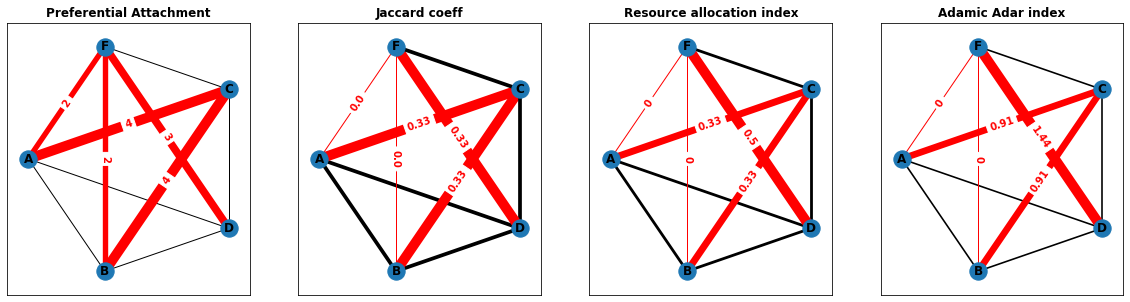

In [82]:
def plot_newEdge(G, pos, FX, minmax):
    urEdges = list(G.edges())
    a,b,c = list(zip(*FX(G)))
    newEdges = urEdges + list(zip(a,b))     
    newEdges = [tuple(sorted(list(x))) for x in newEdges]  # sort each tupel in list
    
    # will be sorted later
    w = [0.1]*len(G.edges()) + list(c) # 0 should be set to minimum
    col = ['black']*len(G.edges()) + ['red']*len(c)
    
    # start over again
    G = nx.Graph(); G.add_edges_from(newEdges)
        
    # sort according to order in G.edges(), create cols, weights
    sortIdx = [newEdges.index(tuple(sorted(list(x)))) for x in G.edges()]
    col = [col[i] for i in sortIdx]
    w = [round(w[i],2) for i in sortIdx]
    edgeW_dict = dict(zip(list(G.edges()),w))
    
    # adjust weights to match limits
    if len(minmax) == 2:
        scaleF = (minmax[1] - minmax[0]) / (max(w) - min(w))       
        w_adjusted = [(x - min(w)) * scaleF + minmax[0] for x in w]
    else:
        w_adjusted = w
        
    # remove weight values for old edges
    for key, value in edgeW_dict.items():
        if key in urEdges:
            edgeW_dict[key] = ''
        else:
            edgeW_dict[key] = value
    nx.draw_networkx(G,pos, edge_color = col, width=w_adjusted);
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edgeW_dict, font_color='red');
    
G = nx.Graph()
# example from lecture 4
#G.add_edges_from([('A', 'B'), ('A', 'D'), ('A','E'), ('B','C'), ('B','D'), ('C','D'), ('C','F'), ('E','F'), ('E','G'), ('F','G'), ('G','H'), ('G','I')])
G.add_edges_from([('A', 'B'), ('A', 'D'), ('B','D'), ('C','D'), ('C','F')])
pos = nx.shell_layout(G)

fig, ax = plt.subplots(1,4,figsize=(20,5))
plt.sca(ax[0])
plot_newEdge(G, pos, nx.preferential_attachment, [1,10])
plt.title('Preferential Attachment');

plt.sca(ax[1])
plot_newEdge(G, pos, nx.jaccard_coefficient, [1,10])
plt.title('Jaccard coeff');

plt.sca(ax[2])
plot_newEdge(G, pos, nx.resource_allocation_index, [1,10])
plt.title('Resource allocation index');

plt.sca(ax[3])
plot_newEdge(G, pos, nx.adamic_adar_index, [1,10])
plt.title('Adamic Adar index');


__Community Structure__ There are also methods that use common neighbors & resource allocation procedures to predict edges in networks with multiple communities. These methods are similar to the basic ones described above, with the added constraint that nodes prefer to connect WITHIN the same community.

Common neighbors with same community BONUS (*nx.soundarajan_hopcroft_score()*). Here, common neighbours only count if there are also in a common community. The same principle applies for resource allocation (*nx.ra_index_soundarajan_hopcroft*)



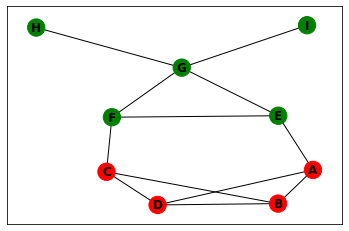

Checking COMMON NEIGHBORS for edge A-G vs H-I
[('A', 'G', 1)]
[('I', 'H', 2)]

Prediction: I-H wins!
Why? For I-H, each node has one common neighbor in the same GREEN community. For A-G, only node G has 1 common neighbor in same community

Checking RESOURCE ALLOC for edge A-G vs H-I
[('A', 'G', 0)]
[('I', 'H', 0.25)]

Prediction: I-H wins again (for the same reason, ie added community bonus)


In [83]:
print('Common neighbors with same community BONUS (*nx.soundarajan_hopcroft_score()*). Here, common neighbours only count if there are also in a common community. The same principle applies for resource allocation (*nx.ra_index_soundarajan_hopcroft*)\n')

G = nx.Graph()
# example from lecture 4
G.add_edges_from([('A', 'B'), ('A', 'D'), ('A','E'), ('B','C'), ('B','D'), ('C','D'), ('C','F'), ('E','F'), ('E','G'), ('F','G'), ('G','H'), ('G','I')])
# add community membership
G.nodes['A']['community']=0
G.nodes['B']['community']=0
G.nodes['C']['community']=0
G.nodes['D']['community']=0
G.nodes['E']['community']=1
G.nodes['F']['community']=1
G.nodes['G']['community']=1
G.nodes['H']['community']=1
G.nodes['I']['community']=1

# get colors
cm = ['red' if x[1]['community']==0 else 'green' for x in G.nodes(data=True)]
# print
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos, node_color=cm); plt.show();

print('Checking COMMON NEIGHBORS for edge A-G vs H-I')
print(list(nx.cn_soundarajan_hopcroft(G, [('A','G')]))) # note: can also be performed for all free edges (*nx.non_edges*) if the list argument is omitted
print(list(nx.cn_soundarajan_hopcroft(G, [('I','H')])))
print('\nPrediction: I-H wins!\nWhy? For I-H, each node has one common neighbor in the same GREEN community. For A-G, only node G has 1 common neighbor in same community')

print('\nChecking RESOURCE ALLOC for edge A-G vs H-I')
print(list(nx.ra_index_soundarajan_hopcroft(G, [('A','G')]))) # note: can also be performed for all free edges (*nx.non_edges*) if the list argument is omitted
print(list(nx.ra_index_soundarajan_hopcroft(G, [('I','H')])))
print('\nPrediction: I-H wins again (for the same reason, ie added community bonus)')


--------------
__Creating a PANDAS feature matrix from a Graph (and vice versa)__
- Create DataFrame from Graph
- Create Graph from DataFrame
- Extracting stats from graph and inserting them into DFs (can later be included into graph if the DF is used to re-construct the graph)

In [84]:
print('Converting DFs to a graph and vice versa, extracting information and storing it in DFs')

# 0) read DFs with node and edgelists (will be overwritten later ... kinda an egg/chick issue)

df_nodes = pd.read_excel(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/Major_US_cities.xlsx', sheet_name='nodes', index_col = 0)
df_edges = pd.read_excel(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/Major_US_cities.xlsx', sheet_name='edges', index_col = [0,1])

# 1) Read a graph from pandas dataframes
# create a graph from Edge- & Nodelist DataFrames
df = df_edges.reset_index() # need to undo multiindex (now as separate columns)
G = nx.from_pandas_edgelist(df, 'level_0', 'level_1', ['weight']) # requires source and target and attribs if exist

# add node attributes
node_attr = df_nodes.to_dict('index') # convert to dictionary with index as key
nx.set_node_attributes(G, node_attr)

# 2) Create DFs based on a graph  /  GRAPH -> DataFrame: store network in DF: Will create 2 separate DFs (edgelist, nodelist)
df_nodes = pd.DataFrame(index = G.nodes()) # initialize only with INDEX
df_nodes['population'] = pd.Series(nx.get_node_attributes(G, 'population'))
df_nodes['location'] =pd.Series(nx.get_node_attributes(G, 'location'))

df_edges = pd.DataFrame(index = G.edges())    # uses multiindex!
df_edges['weight'] = pd.Series(nx.get_edge_attributes(G, 'weight'))

# # 3) export edge & node lists as separate sheets in XLS file
# with pd.ExcelWriter(r'C:\Users\s01tk9\Desktop\Coursera\Introduction to Data Science in Python\assets\Major_US_cities.xlsx') as writer:  
#    df_edges.to_excel(writer, sheet_name='edges')  
#    df_nodes.to_excel(writer, sheet_name='nodes')  
    
# 4) extracting node & edge ATTRIBUTES and save them in DF:
# node attribute 
df_nodes['degs'] = pd.Series(dict(G.degree()))
df_nodes['ecc'] = pd.Series(dict(nx.eccentricity(G)))

# edge attribute: order the sequence by index and unpack / use list comprehension to convert to series
_,_,a = zip(*list(nx.preferential_attachment(G, df_edges.index)))
df_edges['preferential attachment'] = pd.Series(a, index=df_edges.index)
# when two input arguments are expected, use lambda to map index
df_edges['common neighs'] = df_edges.index.map(lambda city: len(list(nx.common_neighbors(G, city[0], city[1]))))

print('\nFirst five nodes\n', list(G.nodes(data=True))[:5])
print('\nFirst five edges\n', list(G.edges(data=True))[:5])

Converting DFs to a graph and vice versa, extracting information and storing it in DFs

First five nodes
 [('El Paso, TX', {'population': 674433, 'location': '(-106, 31)'}), ('Albuquerque, NM', {'population': 556495, 'location': '(-106, 35)'}), ('Mesa, AZ', {'population': 457587, 'location': '(-111, 33)'}), ('Tucson, AZ', {'population': 526116, 'location': '(-110, 32)'}), ('Phoenix, AZ', {'population': 1513367, 'location': '(-112, 33)'})]

First five edges
 [('El Paso, TX', 'Albuquerque, NM', {'weight': 367.8858435610834}), ('El Paso, TX', 'Mesa, AZ', {'weight': 536.256659972679}), ('El Paso, TX', 'Tucson, AZ', {'weight': 425.4138673998822}), ('El Paso, TX', 'Phoenix, AZ', {'weight': 558.7835703774161}), ('El Paso, TX', 'Colorado Springs, CO', {'weight': 797.7517116740046})]
